In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from matplotlib import cycler

In [26]:
def set_matplot_params(font_size = 8, xtick_major = 0.25, xtick_minor = 0.25, ytick_major = 0.25, ytick_minor = 0.25):
    params_dict = {
        'text.usetex': False,
        # 'font.family': 'Times New Roman',
        # 'font.serif': 'Times New Roman',
        # 'font.sans-serif': 'Times New Roman',
        'font.size': font_size,
        'figure.figsize': [3.125, 1.93],  # Golden ratio
        #figure.figsize: 3.125, 1.56  # Squash for more space
        'legend.fontsize': font_size-2,
        'legend.fancybox': False,
        'axes.linewidth': 0.5,
        'pdf.fonttype' : 42,
        'ps.fonttype' : 42,
        'axes.prop_cycle': cycler("color", ['348ABD', 'A60628', '7A68A6', '467821', 'CF4457', '188487', 'E24A33']),
                          # 348ABD : blue
                          # A60628 : red
                          # 7A68A6 : purple
                          # 467821 : green
                          # CF4457 : pink
                          # 188487 : turquoise
                          # E24A33 : orange
        'patch.linewidth': 0.5,
        'lines.linewidth': 2,
        'grid.linewidth': 0.1,
        'xtick.major.width': xtick_major,
        'xtick.minor.width': xtick_minor,
        'ytick.major.width': ytick_major,
        'ytick.minor.width': ytick_minor,
        'legend.numpoints': 1}
    plt.rcParams.update(params_dict)

In [27]:
campus_dataset_attack = pd.read_csv('../connectors_experiment/connectors-salt-attack-443.pcap_Flow.csv')
campus_dataset_attack['Class'] = 1

campus_dataset_benign = pd.read_csv('../connectors_experiment/connectors-salt-benign-443.pcap_Flow.csv')
campus_dataset_benign['Class'] = 0

campus_dataset = pd.concat([campus_dataset_attack, campus_dataset_benign])

azure_dataset_attack = pd.read_csv('../connectors_experiment/connectors-azure-attack-443.pcap_Flow.csv')
azure_dataset_attack['Class'] = 1

azure_dataset_benign = pd.read_csv('../connectors_experiment/connectors-azure-benign-443.pcap_Flow.csv')
azure_dataset_benign['Class'] = 0

azure_dataset = pd.concat([azure_dataset_attack, azure_dataset_benign])

In [28]:
campus_dataset = campus_dataset.drop([
    'Flow ID',
    'Src IP',
    'Dst IP',
    'Src Port',
    'Timestamp', 
    'Protocol',    # always tcp
    'Label',       # empty
], axis=1)

azure_dataset = azure_dataset.drop([
    'Flow ID',
    'Src IP',
    'Dst IP',
    'Src Port',
    'Timestamp', 
    'Protocol',    # always tcp
    'Label',       # empty
], axis=1)

campus_dataset = campus_dataset.replace([np.inf, -np.inf], np.nan)
campus_dataset = campus_dataset.dropna(axis=0)

azure_dataset = azure_dataset.replace([np.inf, -np.inf], np.nan)
azure_dataset = azure_dataset.dropna(axis=0)

In [29]:
campus_dataset['Environment'] = 'Campus'
azure_dataset['Environment'] = 'Azure'
combined_dataset = pd.concat([campus_dataset, azure_dataset])

In [30]:
combined_dataset = combined_dataset.drop([
    "Dst Port",
    "Class",
], axis=1)

In [31]:
columns_iter = iter(combined_dataset.columns)
columns_iter = filter(lambda x: 'IAT' not in x, columns_iter)

Flow Duration



KeyboardInterrupt



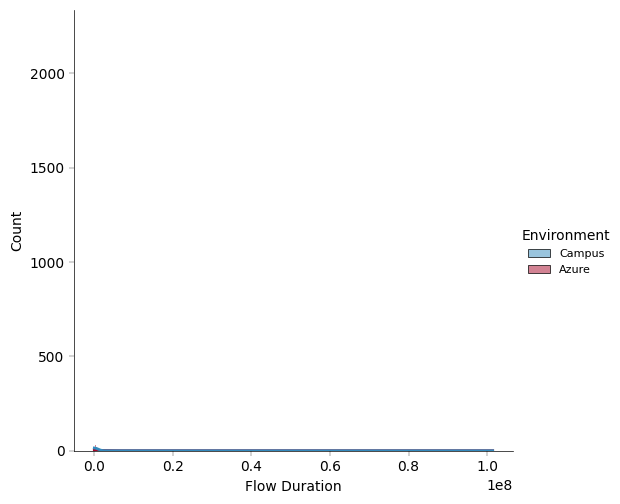

In [34]:
x = next(columns_iter)
print(x)
sns.displot(data=combined_dataset, x=x, hue='Environment', kde=True)
plt.show()

In [33]:
# plt.xkcd()

In [12]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [18]:
set_matplot_params(font_size=10)

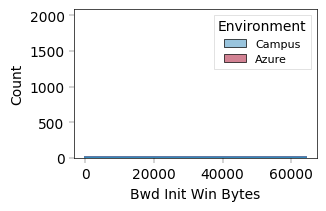

<AxesSubplot: xlabel='Bwd Init Win Bytes', ylabel='Proportion'>

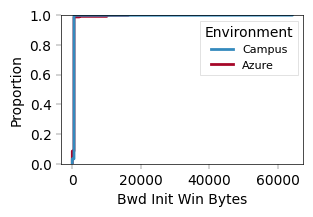

In [35]:
x = 'Bwd Init Win Bytes'
fig, ax = plt.subplots()
sns.histplot(data=combined_dataset, x=x, hue='Environment', ax=ax, kde=True)
# ax.set_xlim(25, 200)
# ax.set_ylim(0, 1000)
plt.show()


fig, ax = plt.subplots()
sns.ecdfplot(data=combined_dataset, x=x, hue='Environment', ax=ax)
# ax.set_xlim(-5, 250)

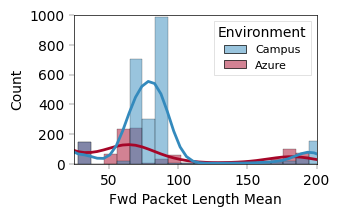

(-5.0, 250.0)

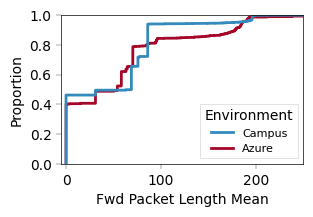

In [19]:
x = 'Fwd Packet Length Mean'
fig, ax = plt.subplots()
sns.histplot(data=combined_dataset, x=x, hue='Environment', ax=ax, kde=True)
ax.set_xlim(25, 200)
ax.set_ylim(0, 1000)
plt.show()


fig, ax = plt.subplots()
sns.ecdfplot(data=combined_dataset, x=x, hue='Environment', ax=ax)
ax.set_xlim(-5, 250)

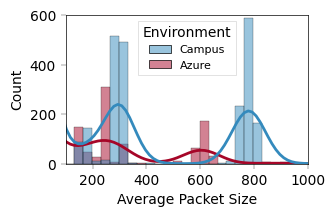

(-5.0, 1000.0)

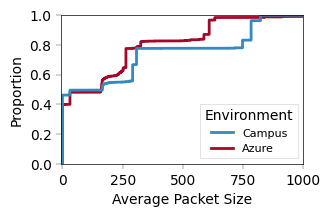

In [20]:
x = 'Average Packet Size'
fig, ax = plt.subplots()
sns.histplot(data=combined_dataset, x=x, hue='Environment', ax=ax, kde=True)
ax.set_xlim(100, 1000)
ax.set_ylim(0, 600)
plt.show()

fig, ax = plt.subplots()
sns.ecdfplot(data=combined_dataset, x=x, hue='Environment', ax=ax)
ax.set_xlim(-5, 1000)

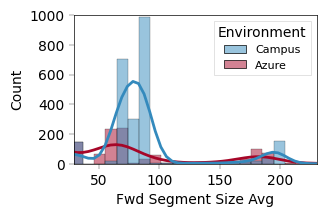

(-5.0, 250.0)

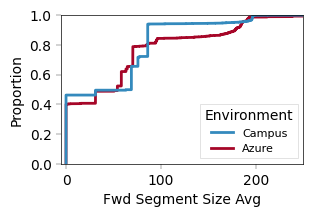

In [21]:
x = 'Fwd Segment Size Avg'
fig, ax = plt.subplots()
sns.histplot(data=combined_dataset, x=x, hue='Environment', ax=ax, kde=True)
ax.set_xlim(30, 230)
ax.set_ylim(0, 1000)
plt.show()

fig, ax = plt.subplots()
sns.ecdfplot(data=combined_dataset, x=x, hue='Environment', ax=ax)
ax.set_xlim(-5, 250)